ChebyShev vs Hoeffding Bound

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

m = np.arange(100)
epsilon2 = 0.0025

y_cheby = [1/(4*m_i*epsilon2) for m_i in m] 
y_hoff = [2*np.exp(-2*m_i*epsilon2) for m_i in m]

plt.plot(m, y_cheby, label='Chebyshev')
plt.plot(m, y_hoff, label='Hoeffding')
plt.xlabel('m')
plt.ylabel('Bound')
plt.legend()
plt.grid(True)
plt.show()

Compare Gradient Time (Bar Plots)

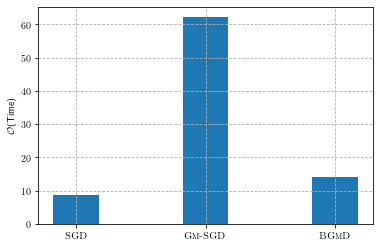

In [34]:
import matplotlib.pyplot as plt
from matplotlib import rc

# grad = [0.010962245608365423, 0.008717414271775945, 0.008859736674686812]
agg = [8.58, 62.28, 14.13]
ind = np.arange(3)
width = 0.35

p1 = plt.bar(ind, agg, width)
# p2 = plt.bar(ind, grad, width, bottom=agg)

rc('text', usetex=True)
plt.xticks(ind, (r"\textsc{SGD}", r"\textsc{Gm-SGD}", r"\textsc{BGmD}"))
plt.ylabel(r"$\mathcal{O}$(Time)")
plt.grid(True, which='both', linestyle='--')
#plt.legend((p1[0], p2[0]), ('Gradient Aggregation', 'Gradient Computation'))
plt.show()


Compare GM-SGD vs BGMD Complexity

In [4]:
def gm_sgd(d,epsilon):
    return (d/epsilon**2)

def sgd(d, b):
    return b*d

def bgmd(d, epsilon, b, beta):
    return ((d*beta)/epsilon**2) + (2*b*d) + (d*np.log(d)) #(4*b*d) 

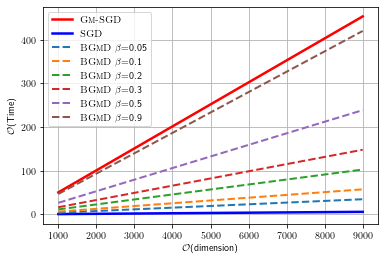

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

epsilon = 1e-2
b = 128
dim = np.arange(start=1e3, stop=1e4, step=1000) 
# dim = [1163978]
f = 198652

y_sgd = [sgd(d, b)/f for d in dim]
y_gm = [gm_sgd(d, epsilon)/f for d in dim]
plt.plot(dim, y_gm, label=r"\textsc{Gm-SGD}", linewidth=2.5, color='r')
plt.plot(dim, y_sgd, label=r"\textsc{SGD}", linewidth=2.5, color='b')

for beta in [0.05, 0.1, 0.2, 0.3, 0.5, 0.9]:
    y_bgmd = [bgmd(d, epsilon, b, beta)/f for d in dim]
    plt.plot(dim, y_bgmd, label=r"\textsc{BGmD} $\beta$="+str(beta), linestyle='--',linewidth=2) 
    
# plt.yscale('log')
plt.xticks(dim)
plt.xlabel(r"$\mathcal{O}$(dimension)")
plt.ylabel(r"$\mathcal{O}$(Time)")
plt.legend()
plt.grid()
plt.show()

Compute Times Properly 

In [16]:
import time
import numpy as np 

b = 32
d = 1163978

a = np.random.rand(b, d)

t0 = time.time()
mu = np.mean(a, axis=0)
print(4*(time.time()-t0)*1740)


517.6726341247559


(1163978,)